In [48]:
import os
import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")


In [8]:
data_path = '/Users/anhthyngo/ds-projects/nfl-predict/data/'
pbp = pd.read_csv(data_path+'2009-2019-play-by-play.csv.gz', low_memory = False)

In [11]:
merged = pd.read_csv(data_path+'merged_pbp-2014-2019.csv', low_memory = False)

In [12]:
pbp.shape

(505327, 257)

In [13]:
merged.shape

(212142, 277)

In [81]:
merged.head(2)

,Unnamed: 0,Unnamed: 0.1,play_id,game_id,home_team_x,away_team_x,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,as

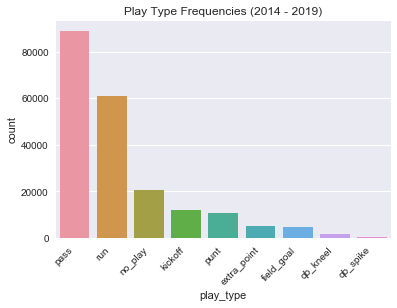

In [50]:
sns.countplot(merged['play_type'],order = merged['play_type'].value_counts().index)
plt.title("Play Type Frequencies (2014 - 2019)")
plt.xticks(rotation=45, ha='right')
plt.show()

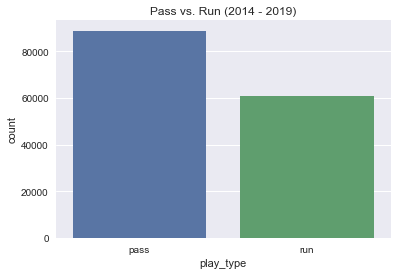

In [51]:
## We will subset data to only pass + run
rp = merged[(merged['play_type'] == 'run') | (merged['play_type'] == 'pass')]
sns.countplot(rp['play_type'])
plt.title("Pass vs. Run (2014 - 2019)")
plt.show()

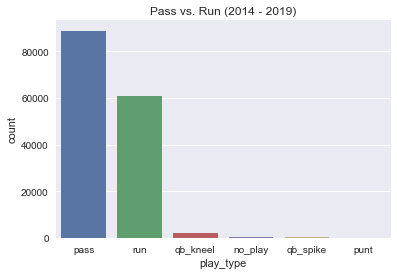

In [77]:
## qb kneels, no plays, qb spikes, punts included
## we will predict rush_attempt/pass_attempt
rp = merged[(merged['rush_attempt'] == 1) | (merged['pass_attempt'] == 1)]
sns.countplot(rp['play_type'])
plt.title("Pass vs. Run (2014 - 2019)")
plt.show()

[1. 2. 3. 4.]


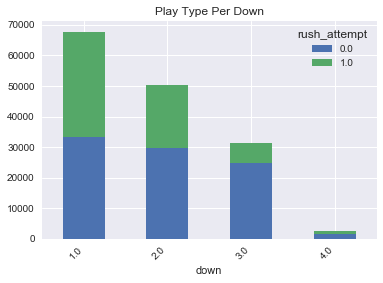

In [92]:
print(rp['down'].unique())
## remove down 0, which is basically extra points, etc.
rp = rp[rp['down'] != 0]

## 1 = rush (green), 0 = pass (blue)
merged['down'].unique()
rp = rp[rp['down'].notnull()]
rp.groupby(['down', 'rush_attempt']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Play Type Per Down')
plt.xticks(rotation=45, ha='right')
plt.show()

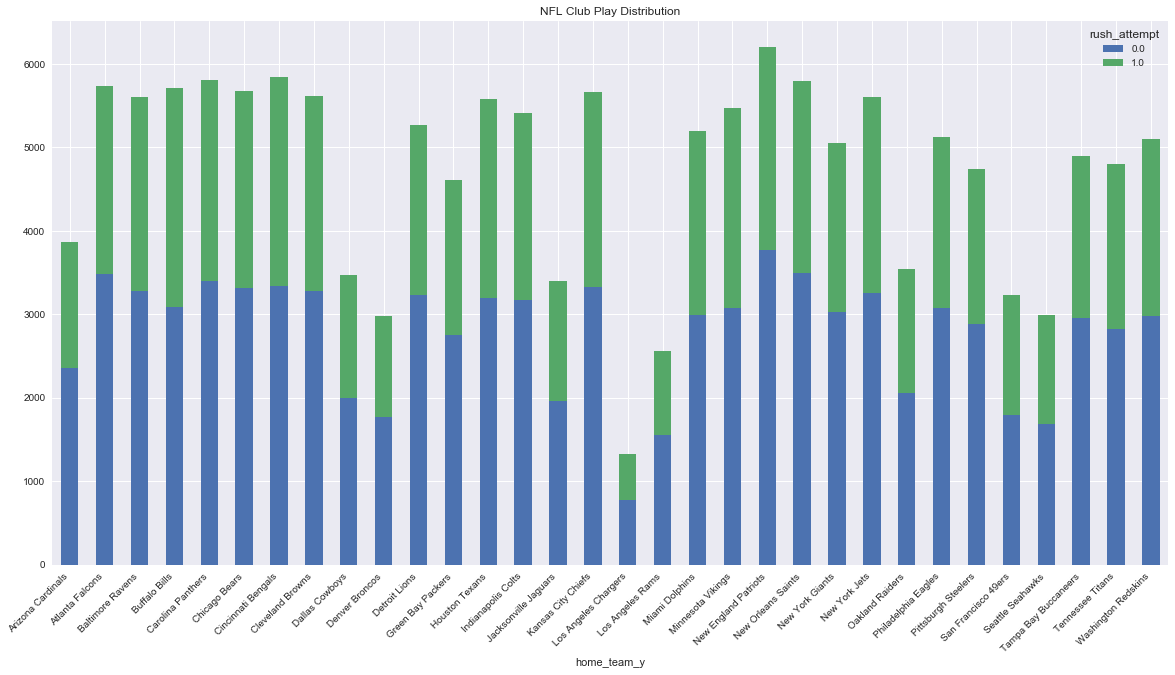

In [97]:
rp.groupby(['home_team_y','rush_attempt']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10))
plt.title("NFL Club Play Distribution")
plt.xticks(rotation=45, ha='right')
plt.show()